<a href="https://colab.research.google.com/github/jangwon415/GeneratingPointCloudInDesiredShape/blob/master/%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C_%EC%99%80%EC%9D%B8%EC%B6%94%EC%B2%9C_%EA%B3%A0%EC%9E%A5%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
winedata_dir =  '/content/drive/MyDrive/AICon_Project/cleansingWine.csv'

Mounted at /content/drive


In [2]:
#data import
import pandas as pd
wine_data = pd.read_csv(winedata_dir)
#wine_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#data cleansing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import SpectralClustering


cleansed_wine_data = wine_data[['name', 'producer', 'nation','local1', 'varieties1', 'type', 'use', 'abv', 'sweet', 'acidity', 'body', 'tannin', 'year']]

#missing value 행 삭제 (21605개 --> 13553개)
cleansed_wine_data = cleansed_wine_data.dropna(subset=["nation", "local1", "varieties1", "type", "use", "abv", "sweet", "acidity", "body", "tannin", "year"])
data_to_float = wine_data[['nation','local1', 'varieties1', 'type', 'use', 'abv', 'sweet', 'acidity', 'body', 'tannin', 'year']]


# 데이터 encoding 위해 array 한개로 합쳐...
data_array_to_encode = []
for col in data_to_float.columns:
  curr_data = data_to_float[col]
  for i in range(len(curr_data)):
    data_array_to_encode.append(curr_data[i])


le = LabelEncoder()

wind_data_encoded = le.fit_transform(data_array_to_encode)
le_naming_mapping = dict(zip(le.classes_, le.transform(le.classes_)))


encoded_data = []
for j in range(len(data_to_float)):
  single_wine_data = []
  for i in range(len(data_to_float.iloc[j])):
    data = str(data_to_float.iloc[j,i])
    encode = le_naming_mapping[data]
    single_wine_data.append(encode)
  encoded_data.append(single_wine_data)



In [4]:
#TNSE (3분)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(random_state = 42)
wine_tsne = tsne.fit_transform(encoded_data)

In [5]:
'''
#n_clusters = 5, (4분)
sc = SpectralClustering(n_clusters=5,
                        random_state=42,
                        affinity='nearest_neighbors')

sc_fit = sc.fit(encoded_data)
y_pred = sc_fit.labels_.astype(int)


#plot
plt.figure(figsize=(10,10))
plt.xlim(wine_tsne[:,0].min(), wine_tsne[:,0].max()+1)
plt.ylim(wine_tsne[:,1].min(), wine_tsne[:,1].max()+1)



plt.scatter(wine_tsne[:,0], wine_tsne[:,1], c=y_pred)
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

SyntaxError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0, 0.5, 't-SNE 특성 1')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


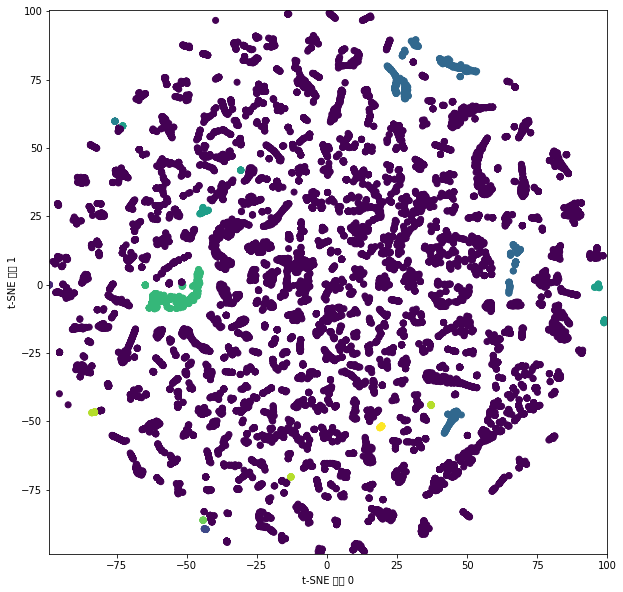

In [ ]:
'''
#n_clusters = 10 (5분 40초)
sc = SpectralClustering(n_clusters=10,
                        random_state=42,
                        affinity='nearest_neighbors')

sc_fit = sc.fit(encoded_data)
y_pred = sc_fit.labels_.astype(int)


#plot
plt.figure(figsize=(10,10))
plt.xlim(wine_tsne[:,0].min(), wine_tsne[:,0].max()+1)
plt.ylim(wine_tsne[:,1].min(), wine_tsne[:,1].max()+1)



plt.scatter(wine_tsne[:,0], wine_tsne[:,1], c=y_pred)
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0, 0.5, 't-SNE 특성 1')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


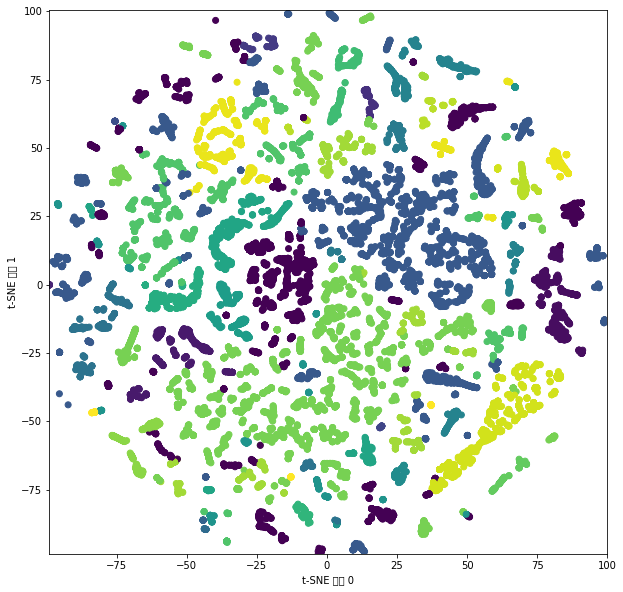

In [6]:

#n_clusters = 30 (1분)
sc = SpectralClustering(n_clusters=30,
                        random_state=42,
                        affinity='nearest_neighbors')


sc_fit = sc.fit(encoded_data)
y_pred = sc_fit.labels_.astype(int)


#plot
plt.figure(figsize=(10,10))
plt.xlim(wine_tsne[:,0].min(), wine_tsne[:,0].max()+1)
plt.ylim(wine_tsne[:,1].min(), wine_tsne[:,1].max()+1)



plt.scatter(wine_tsne[:,0], wine_tsne[:,1], c=y_pred)
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0, 0.5, 't-SNE 특성 1')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


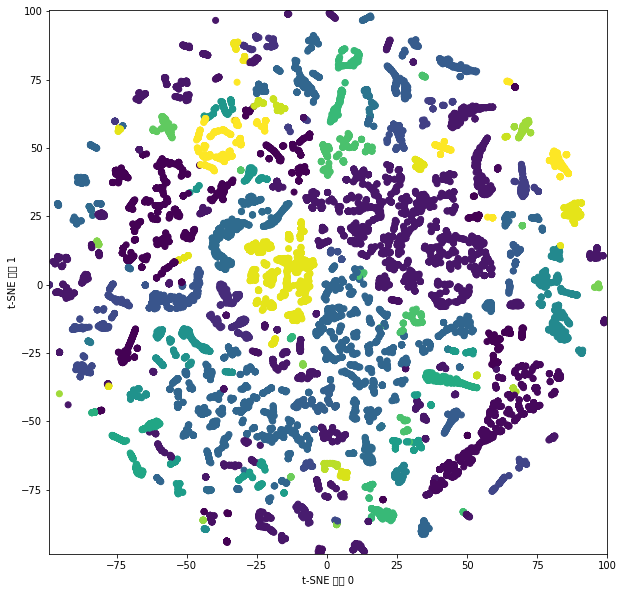

In [ ]:
'''
#n_clusters = 50 (2분)
sc = SpectralClustering(n_clusters=50,
                        random_state=42,
                        affinity='nearest_neighbors')


sc_fit = sc.fit(encoded_data)
y_pred = sc_fit.labels_.astype(int)


#plot
plt.figure(figsize=(10,10))
plt.xlim(wine_tsne[:,0].min(), wine_tsne[:,0].max()+1)
plt.ylim(wine_tsne[:,1].min(), wine_tsne[:,1].max()+1)



plt.scatter(wine_tsne[:,0], wine_tsne[:,1], c=y_pred)
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0, 0.5, 't-SNE 특성 1')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


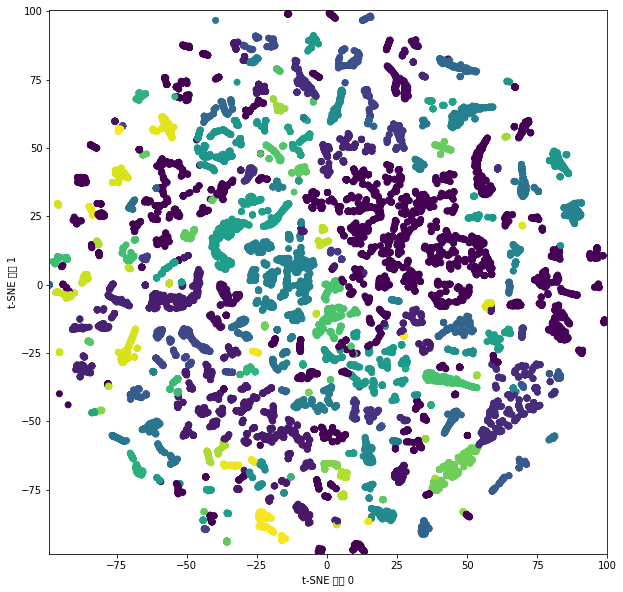

In [ ]:
'''
#n_clusters = 100 (21분)
sc = SpectralClustering(n_clusters=100,
                        random_state=42,
                        affinity='nearest_neighbors')


sc_fit = sc.fit(encoded_data)
y_pred = sc_fit.labels_.astype(int)


#plot
plt.figure(figsize=(10,10))
plt.xlim(wine_tsne[:,0].min(), wine_tsne[:,0].max()+1)
plt.ylim(wine_tsne[:,1].min(), wine_tsne[:,1].max()+1)



plt.scatter(wine_tsne[:,0], wine_tsne[:,1], c=y_pred)
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

In [7]:
affinity_matrix = sc_fit.affinity_matrix_
affinity_matrix

<21605x21605 sparse matrix of type '<class 'numpy.float64'>'
	with 279430 stored elements in Compressed Sparse Row format>

In [8]:
#print(affinity_matrix)
print(affinity_matrix[1, 2])

for i in range(500):
  print(affinity_matrix[2,i])

0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
'''
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd 
from gensim.models import KeyedVectors 

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 

plt.rc('font', family='D2Coding') 

def show_tsne(): 
  tsne = TSNE(n_components=2) 
  X = tsne.fit_transform(X_show) 
  df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
  fig = plt.figure() 
  fig.set_size_inches(30, 20) 
  ax = fig.add_subplot(1, 1, 1) 
  ax.scatter(df['x'], df['y']) 
  
  for word, pos in df.iterrows(): 
    ax.annotate(word, pos, fontsize=10) 
    
  plt.xlabel("t-SNE 특성 0") 
  plt.ylabel("t-SNE 특성 1") 
  plt.show() 
    


def show_pca(): 
  # PCA 모델을 생성합니다 
  pca = PCA(n_components=2) 
  pca.fit(X_show) 
  # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
  x_pca = pca.transform(X_show) 
  
  plt.figure(figsize=(30, 20)) 
  plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
  plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
  for i in range(len(X_show)): 
    plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), fontdict={'weight': 'bold', 'size': 9}) 
    plt.xlabel("첫 번째 주성분") 
    plt.ylabel("두 번째 주성분") 
    plt.show() 
    

model_name = 'D:/Data/embedding/data/word-embeddings/word2vec/word2vec' 
model = KeyedVectors.load_word2vec_format(model_name) 

vocab = list(model.wv.vocab) 
X = model[vocab] 

# sz개의 단어에 대해서만 시각화 
sz = 800 
X_show = X[:sz,:] 
vocab_show = vocab[:sz] 

show_tsne() 
#show_pca()